# Tarea 11 - Sebastián Negrete Aragón - Física Computacional
# Semestre 2017-2

Para obtener una solución aproximada de la ecuación diferencial:
$$\frac{dx}{dt}=f(x,t),$$
utilizando el método de Euler, se implementa la siguiente fórmula de recurrencia:
$$x_{k+1}=x_k+f(x_k,t_k),$$
donde $x_k=x(t_k)$ y $t_k=h k.$

Recordemos que para resolver una ecuación diferencial necesitamos la condición inicial, que para este método naturalmente se hace corresponder con $x_0$.

## Ejercicio 1

Implementa el método de Euler en `Julia`. Debe ser de la forma `metodo_euler(f,x0,t0,tf,h)`. No olvide que no debe de utilizar `SymPy` de ningún modo en este ejercicio. Naturalmente la función `f` es de dos variables. El _output_ de la función debe ser `return listt,listx`. Otra forma quizá más inteligente de implementarlo es definir desde antes `listt`, y que los inputs del método sean de la forma: `metodo_euler(f,x0,listt)`, naturalmente en `listt` va el tiempo inicial $t_0$ y el paso $h$ que utilizará el método.
* Pruebe su nuevo método resolviendo la ecuación:
$$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$
con $\alpha>0$, pruebenlo para $\alpha=2.5$, $h=1.0,0.5,0.2,0.01$.
* Gráfique la solución que obtuvo junto con la curva de la solución exacta, asegúrese de que los puntos de la solución aparezcán unidos en la gráfica para obtener una mejor perspectiva. Haga una gráfica para cada condición inicial, que incluya todos los diferentes pasos usados (excepto $h=1$, este gráfiquelo aparte para cada caso), la idea aquí es ver como nos aproximamos a la solución exacta conforme tomamos $h$'s más pequeños.

In [1]:
#La siguiente función implementa el método de Euler para resolver la ecuación diferencial de primer orden dx/dt=f(x,t) usando la segunda forma (la más inteligente)
#Recibe como argumentos
#f: la función de la ecuación
#x0: Condición inicial
#listt lista la cual aglomera la condición de tiempo inicial (primer valor) y el paso h que pide el método (incremento la cantidad de veces necesarias)
function metodo_euler(f,x0,listt)
    longitud=length(listt) #Variable para obtener el número de elementos de la lista, sirve para controlar la iteración
    listx=zeros(longitud)  #Lista para guardar las x_k de la iteración
    listx[1]=x0 #En listx el primer valor es la condición inicial x0
    h=abs(listt[2]-listt[1]) #Para obtener el incremento h en nuestra lista h sacamos la diferencia entre los primeros dos elementos (se crea un linspace o análogos con particiones homogéneas, por eso es útil esto)
    for i in 1:longitud-1 #Ciclo for, se hace tantas veces como la longitud de la lista menos un valor
        listx[i+1]=listx[i]+(h*f(listx[i],listt[i])) # Método de Euler aplicado
    end #Fin de ciclo
    return listx #Regresamos listx
end

metodo_euler (generic function with 1 method)

Probando nuestro código como lo especifíca el ejercicio para:
$$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$
con $\alpha>0$, para $\alpha=2.5$, $h=1.0,0.5,0.2,0.01$.

__Por lo que sabemos de Ecuaciones Diferenciales la solución a dicha ecuación diferencial es:
$$x(t)=x_{0}e^{-2.5t}$$__

__*A continuación para el caso con condición a la frontera $x(0)=1$*__

In [2]:
#Definimos nuestra función f(x,t)
f(x,t)=-2.5x

f (generic function with 1 method)

In [3]:
#Definimos la listt usando listat1, tomando el intervalo (0,8) y h=1
listat1=0:1:8

0:1:8

In [4]:
#Aplicando el método de Euler para la condición inicial x0=1
euler11=metodo_euler(f,1,listat1)

9-element Array{Float64,1}:
   1.0    
  -1.5    
   2.25   
  -3.375  
   5.0625 
  -7.59375
  11.3906 
 -17.0859 
  25.6289 

In [5]:
#Para graficar usaremos PyPlot
using PyPlot

In [6]:
#Para graficar la solución exacta
t=linspace(0,8,100)

0.0:0.08080808080808081:8.0

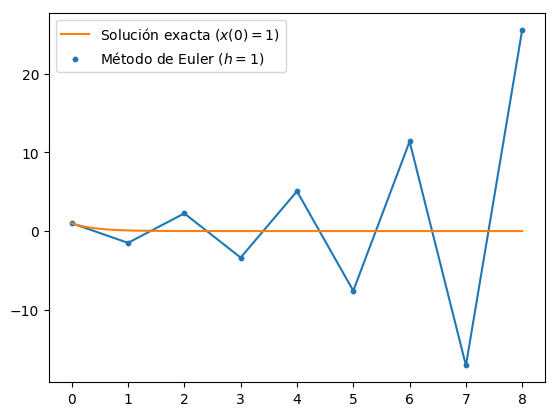

In [7]:
scatter(listat1,euler11,label=L"Método de Euler ($h=1$)",s=10)
plot(listat1,euler11)
plot(t,exp.(-2.5*t),label=L"Solución exacta ($x(0)=1$)")
legend()
show()

In [8]:
#Para el caso con h=0.5
listat2=0:0.5:8
euler12=metodo_euler(f,1,listat2)

17-element Array{Float64,1}:
  1.0        
 -0.25       
  0.0625     
 -0.015625   
  0.00390625 
 -0.000976563
  0.000244141
 -6.10352e-5 
  1.52588e-5 
 -3.8147e-6  
  9.53674e-7 
 -2.38419e-7 
  5.96046e-8 
 -1.49012e-8 
  3.72529e-9 
 -9.31323e-10
  2.32831e-10

In [9]:
#Para el caso con h=0.2
listat3=0:0.2:8
euler13=metodo_euler(f,1,listat3)

41-element Array{Float64,1}:
 1.0        
 0.5        
 0.25       
 0.125      
 0.0625     
 0.03125    
 0.015625   
 0.0078125  
 0.00390625 
 0.00195313 
 0.000976563
 0.000488281
 0.000244141
 ⋮          
 1.86265e-9 
 9.31323e-10
 4.65661e-10
 2.32831e-10
 1.16415e-10
 5.82077e-11
 2.91038e-11
 1.45519e-11
 7.27596e-12
 3.63798e-12
 1.81899e-12
 9.09495e-13

In [10]:
#Para el caso h=0.01
listat4=0:0.01:8
euler14=metodo_euler(f,1,listat4)

801-element Array{Float64,1}:
 1.0       
 0.975     
 0.950625  
 0.926859  
 0.903688  
 0.881096  
 0.859068  
 0.837592  
 0.816652  
 0.796236  
 0.77633   
 0.756921  
 0.737998  
 ⋮         
 2.11175e-9
 2.05895e-9
 2.00748e-9
 1.95729e-9
 1.90836e-9
 1.86065e-9
 1.81413e-9
 1.76878e-9
 1.72456e-9
 1.68145e-9
 1.63941e-9
 1.59843e-9

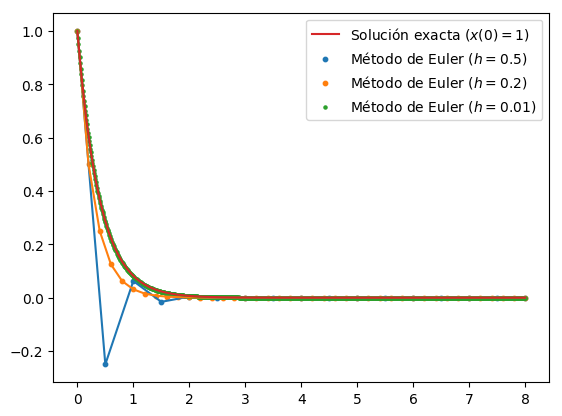

In [11]:
#Graficando estas iteraciones
scatter(listat2,euler12,label=L"Método de Euler ($h=0.5$)",s=10)
plot(listat2,euler12)
scatter(listat3,euler13,label=L"Método de Euler ($h=0.2$)",s=10)
plot(listat3,euler13)
scatter(listat4,euler14,label=L"Método de Euler ($h=0.01$)",s=5)
plot(listat4,euler14)
plot(t,exp.(-2.5*t),label=L"Solución exacta ($x(0)=1$)")
legend()
show()

Notamos que para valores de $h$ más pequeños la aproximación mejora. Comparado a $h=1$ la aproximación deja de oscilar tan abruptamente

__*A continuación para el caso con condición a la frontera $x(0)=2$*__

In [12]:
#Aprovechando que ya definimos f, las listat'n' correspondiente a cada h solo debemos comenzar a evaluar
#Para h=1
euler21=metodo_euler(f,2,listat1)

9-element Array{Float64,1}:
   2.0   
  -3.0   
   4.5   
  -6.75  
  10.125 
 -15.1875
  22.7813
 -34.1719
  51.2578

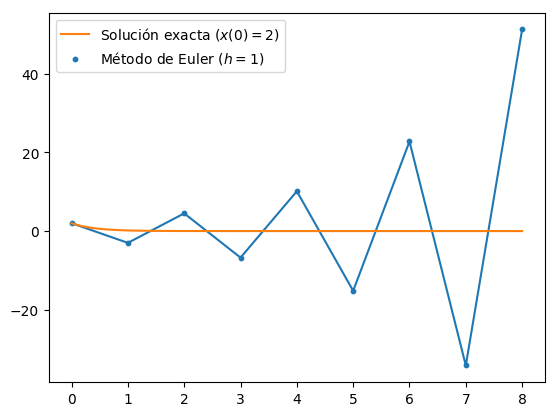

In [13]:
#Graficando para h=1
scatter(listat1,euler21,label=L"Método de Euler ($h=1$)",s=10)
plot(listat1,euler21)
plot(t,2exp.(-2.5*t),label=L"Solución exacta ($x(0)=2$)")
legend()
show()

In [14]:
#Para h=0.5
euler22=metodo_euler(f,2,listat2)

17-element Array{Float64,1}:
  2.0        
 -0.5        
  0.125      
 -0.03125    
  0.0078125  
 -0.00195313 
  0.000488281
 -0.00012207 
  3.05176e-5 
 -7.62939e-6 
  1.90735e-6 
 -4.76837e-7 
  1.19209e-7 
 -2.98023e-8 
  7.45058e-9 
 -1.86265e-9 
  4.65661e-10

In [15]:
#Para h=0.2
euler23=metodo_euler(f,2,listat3)

41-element Array{Float64,1}:
 2.0        
 1.0        
 0.5        
 0.25       
 0.125      
 0.0625     
 0.03125    
 0.015625   
 0.0078125  
 0.00390625 
 0.00195313 
 0.000976563
 0.000488281
 ⋮          
 3.72529e-9 
 1.86265e-9 
 9.31323e-10
 4.65661e-10
 2.32831e-10
 1.16415e-10
 5.82077e-11
 2.91038e-11
 1.45519e-11
 7.27596e-12
 3.63798e-12
 1.81899e-12

In [16]:
#Para h=0.01
euler24=metodo_euler(f,2,listat4)

801-element Array{Float64,1}:
 2.0       
 1.95      
 1.90125   
 1.85372   
 1.80738   
 1.76219   
 1.71814   
 1.67518   
 1.6333    
 1.59247   
 1.55266   
 1.51384   
 1.476     
 ⋮         
 4.22349e-9
 4.11791e-9
 4.01496e-9
 3.91458e-9
 3.81672e-9
 3.7213e-9 
 3.62827e-9
 3.53756e-9
 3.44912e-9
 3.3629e-9 
 3.27882e-9
 3.19685e-9

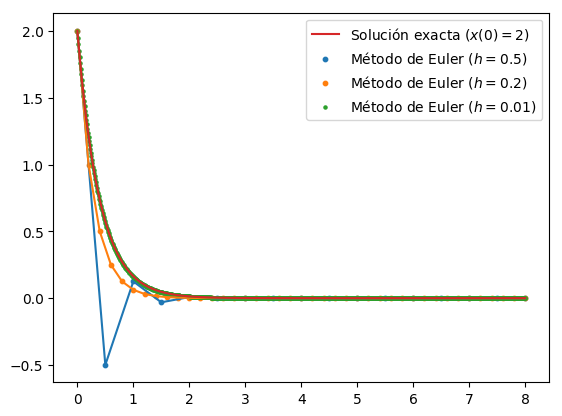

In [17]:
scatter(listat2,euler22,label=L"Método de Euler ($h=0.5$)",s=10)
plot(listat2,euler22)
scatter(listat3,euler23,label=L"Método de Euler ($h=0.2$)",s=10)
plot(listat3,euler23)
scatter(listat4,euler24,label=L"Método de Euler ($h=0.01$)",s=5)
plot(listat4,euler24)
plot(t,2exp.(-2.5*t),label=L"Solución exacta ($x(0)=2$)")
legend()
show()

Se vuelve a apreciar que para  valores de $h$ más pequeños la aproximación mejora

## Ejercicio 2

¿Qué sistema físico está modelado por $\ddot{x} =
-kx$?
* Escriba la solución exacta en terminos de las condiciones iniciales $x(0)$ y $x'(0)$.


A simple vista, uno podría pensar que para resolver este
sistema uno debe desarrollar otro método para encontrar la
solución a la ecuación diferencial del ejercicio pasado. Sin
embargo, esto no es necesario.

__Solución__

Dada la ecuación diferencial:

$$\ddot{x}=-kx,\:k>0$$

Podemos decir que la aceleración (segunda derivada de la posición respecto al tiempo $\ddot{x}$) de un sistema es proporcional a su posición $x$ respecto al origen de un sistema de coordenadas (donde es válida esta expresión). Esta aceleración está dirigida al origen (va en sentido opuesto al crecimiento de la posición), esto nos da un sistema oscilatorio respecto a dicho origen (es un punto de equilibrio el origen).

Resolviendo, se propone como solución $x(t)=e^{rt}$

Se tiene entonces la ecuación característica

$$r^{2}+k=0,$$

con soluciones $r=\pm i\sqrt{k}$

Entonces se tiene que la solución general es:

$$x(t)=c_{1}e^{i\sqrt{k}t}+c_{2}e^{-i\sqrt{k}t}.$$

En particular tomando $c_{1}=c_{2}=\frac{1}{2}$ se tiene que:

$$x_{1}(t)=\cos\left(\sqrt{k}t\right)$$

es solución de la ecuación diferencial

Y para $c_{1}=-c_{2}=\frac{1}{2i}$ tenemos que:

$$x_{2}(t)=\sin\left(\sqrt{k}t\right)$$

también es solución.

Como $\cos$ y $\sin$ son funciones linealmente independientes entonces la solución general a esta ecuación diferencial se puede escribir (ya incluyendo las condiciones iniciales) como:

$$x(t)=x(0)\cos\left(\sqrt{k}t\right)+\frac{\dot{x}(0)}{\sqrt{k}}\:\sin\left(\sqrt{k}t\right)$$

## Ejercicio 3

Haz $u = \dot{x}(t)$ y calcula la derivada de
$u$ ¿qué obtienes y como se relaciona con el sistema
original?

Si llevaste a cabo el ejercicio anterior, te darás cuenta
que terminas con un sistema acoplado de ecuaciones
diferenciales:

$$
\dot{u} = -kx, \dot{x} = u,
$$

Con este sistema acoplado puedes utilizar el método de
Euler en su forma vectorial:
$$\frac{d\vec x}{dt}=\vec f(\vec x,t),$$
donde $\vec x=(x,u)$, y para este caso es facil ver que $\vec f(\vec x,t)=(u,-kx).$

__Solución__

A partir de la ecuación diferencial del ejercicio anterior si tomamos a $u(t)=\dot{x}(t)$, entonces $u(0)=x'(0)$ y $\dot{u}(t)=\ddot{x}(t)=-kx(t)$. Con esto obtenemos el siguiente sistema de ecuaciones diferenciales de primer orden:

$$\left\{\begin{array}{ll}
\dot{x}=u, & x_{0}=x(0)\\
\dot{u}=-kx, & u_{0}=\dot{x}(0)
\end{array}\right.$$

Con éste es posible dar una ecuación diferencial vectorial. 

Sea $\mathbf{x}(t)=(x(t),u(t))$ y $\:\boldsymbol{f}(\mathbf{x},t)=(u(t),-kx(t))$, entonces:

$$\frac{d\mathbf{x}}{dt}=\boldsymbol{f}(\mathbf{x},t),$$

con la condición inicial $\mathbf{x}_{0}=\mathbf{x}(0)$.

Notemos que, en general, si $\ddot{x}=f(x,\dot{x},t)$ con $x_{0}=x(t_{0})$ y $\dot{x}_{0}=\dot{x}(t_{0})$ siempre podemos hacer $u=\dot{x}$ y así $\dot{u}=f(x,u,t)$, por lo tanto al aplicar el método de Euler, se tiene:

$$\left\{\begin{array}{ll}
x_{k+1}=x_{k}+hu_{k}, & x_{0}=x(t_{0})\\
u_{k+1}=u_{k}+hf(x_{k},u_{k},t_{k}), & u_{0}=\dot{x}(t_{0})
\end{array}\right.$$

Esto sirve para implementar el método de Euler para ecuaciones diferenciales de segundo orden.

## Ejercicio 4

Obten la solución del sistema $\ddot{x} = -kx(t)$
utilizando lo escrito arriba y el método de Euler.

__Implementación__

Se dará la solución usando los ejercicios 2 y 3 para $$\ddot{x}=-kx,\:k>0\text{ para }t\in(0,2\pi)$$

In [18]:
#La siguiente función implementa el método de Euler para ecuaciones diferenciales de segundo orden
#Recibe como argumentos
#f: la función de la ecuación
#x0: Condición inicial para x
#u0: Condición inicial para u
#listt lista la cual aglomera la condición de tiempo inicial (primer valor) y el paso h que pide el método (incremento la cantidad de veces necesarias)
#El código es análogo al de primer orden pero solo se agrega la iteración para u0
function metodo_euler_segundo_orden(f,x0,u0,listt)
    longitud=length(listt) #Variable para obtener el número de elementos de la lista, sirve para controlar la iteración
    listx=zeros(longitud) #Lista para guardar las x_k de la iteración
    listu=zeros(longitud) #Lista para guardar las u_k de la iteración, recordando que u_k=x'_k
    listx[1]=x0 #En listx el primer valor es la condición inicial x0
    listu[1]=u0 #En listu el primer valor es la condición inicial u0
    h=listt[2]-listt[1] #Para obtener el incremento h en nuestra lista h sacamos la diferencia entre los primeros dos elementos (se crea un linspace o análogos con particiones homogéneas, por eso es útil esto)
    for i in 1:longitud-1 #Ciclo for, se hace tantas veces como la longitud de la lista menos un valor
        listx[i+1]=listx[i]+h*listu[i] # Método de Euler aplicado a x
        listu[i+1]=listu[i]+h*f(listx[i],listu[i],listt[i]) # Método de Euler aplicado a u
    end #Fin de ciclo
    return listx #Regresamos listx
end

metodo_euler_segundo_orden (generic function with 1 method)

Para probarlo tomaré:
$$k=6,\ \ x(0)=2,\ \ \dot{x}(0)=4$$

In [19]:
#Definimos nuestra función f(x,u,t)
f(x,u,t)=-6x

f (generic function with 2 methods)

In [20]:
#Damos las siguientes listas para t, esto para ver como mejora el método para h cuando decrece
listat1_dos=0:0.2:2pi
listat2_dos=0:0.1:2pi
listat3_dos=0:0.01:2pi

0.0:0.01:6.28

In [21]:
#Aplicando el método para h=0.2
meteulerso1=metodo_euler_segundo_orden(f,2,4,listat1_dos)

32-element Array{Float64,1}:
   2.0     
   2.8     
   3.12    
   2.768   
   1.6672  
  -0.09792 
  -2.26317 
  -4.40492 
  -6.0035  
  -6.54491 
  -5.64548 
  -3.17526 
   0.649861
   ⋮       
 -12.0115  
 -21.1524  
 -27.4106  
 -28.5921  
 -23.1951  
 -10.9361  
   6.88988 
  27.3405  
  46.1375  
  58.3728  
  59.5351  
  46.6879  

In [22]:
#Aplicando el método para h=0.1
meteulerso2=metodo_euler_segundo_orden(f,2,4,listat2_dos)

63-element Array{Float64,1}:
  2.0     
  2.4     
  2.68    
  2.816   
  2.7912  
  2.59744 
  2.23621 
  1.71913 
  1.06788 
  0.31348 
 -0.504991
 -1.34227 
 -2.14925 
  ⋮       
  6.16523 
  8.51672 
 10.4983  
 11.9689  
 12.8096  
 12.9321  
 12.2861  
 10.8641  
  8.70503 
  5.89406 
  2.56079 
 -1.12612 

In [23]:
#Aplicando el método para h=0.01
meteulerso3=metodo_euler_segundo_orden(f,2,4,listat3_dos)

629-element Array{Float64,1}:
  2.0     
  2.04    
  2.0788  
  2.11638 
  2.1527  
  2.18776 
  2.22153 
  2.25399 
  2.28511 
  2.31488 
  2.34327 
  2.37028 
  2.39589 
  ⋮       
 -0.883773
 -0.956731
 -1.02916 
 -1.10101 
 -1.17225 
 -1.24282 
 -1.31269 
 -1.38182 
 -1.45016 
 -1.51767 
 -1.58431 
 -1.65004 

In [24]:
#La solución exacta usando lo que sabemos por el ejercicio 2
solucion(t)=2*cos(sqrt(6)*t)+(4/sqrt(6))*sin(sqrt(6)*t)

solucion (generic function with 1 method)

In [25]:
#Definimos el intervalo para graficar la solución exacta
tso=linspace(0,2pi,100)

0.0:0.06346651825433926:6.283185307179586

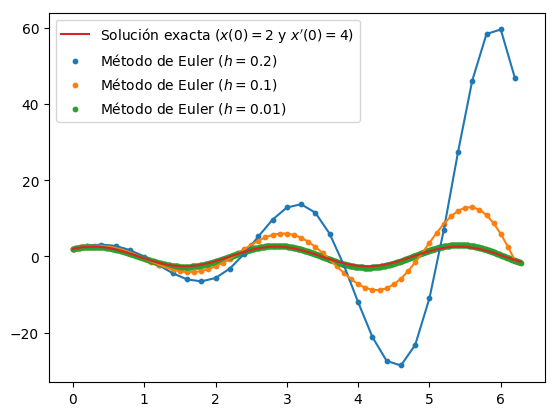

In [26]:
#Graficando
scatter(listat1_dos,meteulerso1,label=L"Método de Euler ($h=0.2$)",s=10)
plot(listat1_dos,meteulerso1)
scatter(listat2_dos,meteulerso2,label=L"Método de Euler ($h=0.1$)",s=10)
plot(listat2_dos,meteulerso2)
scatter(listat3_dos,meteulerso3,label=L"Método de Euler ($h=0.01$)",s=10)
plot(listat3_dos,meteulerso3)
plot(tso,solucion.(tso),label=L"Solución exacta ($x(0)=2$ y $x'(0)=4$)")
legend()
show()

## Ejercicio 5

Aplicar el método de Euler para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$

__Notemos que al ser  una ecuación diferencial de primer orden podemos aplicar el código `metodo_euler`__

__Notemos que de la solución exacta x(0)=4__

In [27]:
#Definimos la función propuesta
f(x,t)=(2x-18t)/(1+t)

f (generic function with 2 methods)

In [28]:
#Damos las listas para h=0.2,0.1 y 0.01 en el intervao (0,3)
listat5=0:0.2:3
listat6=0:0.1:3
listat7=0:0.01:3

0.0:0.01:3.0

In [29]:
#Para h=0.2
euler_5=metodo_euler(f,4,listat5)

16-element Array{Float64,1}:
  4.0    
  5.6    
  6.86667
  7.8    
  8.4    
  8.66667
  8.6    
  8.2    
  7.46667
  6.4    
  5.0    
  3.26667
  1.2    
 -1.2    
 -3.93333
 -7.0    

In [30]:
#Para h=0.1
euler_6=metodo_euler(f,4,listat6)

31-element Array{Float64,1}:
   4.0    
   4.8    
   5.50909
   6.12727
   6.65455
   7.09091
   7.43636
   7.69091
   7.85455
   7.92727
   7.90909
   7.8    
   7.6    
   ⋮      
   3.65455
   2.72727
   1.70909
   0.6    
  -0.6    
  -1.89091
  -3.27273
  -4.74545
  -6.30909
  -7.96364
  -9.70909
 -11.5455 

In [31]:
#Para h=0.01
euler_7=metodo_euler(f,4,listat7)

301-element Array{Float64,1}:
   4.0    
   4.08   
   4.15901
   4.23703
   4.31406
   4.3901 
   4.46515
   4.53921
   4.61228
   4.68436
   4.75545
   4.82554
   4.89465
   ⋮      
 -14.084  
 -14.2901 
 -14.4972 
 -14.7053 
 -14.9145 
 -15.1246 
 -15.3356 
 -15.5477 
 -15.7608 
 -15.9749 
 -16.1899 
 -16.4059 

In [32]:
#Para graficar la solución exacta damos:
tsol=linspace(0,3,100)

0.0:0.030303030303030304:3.0

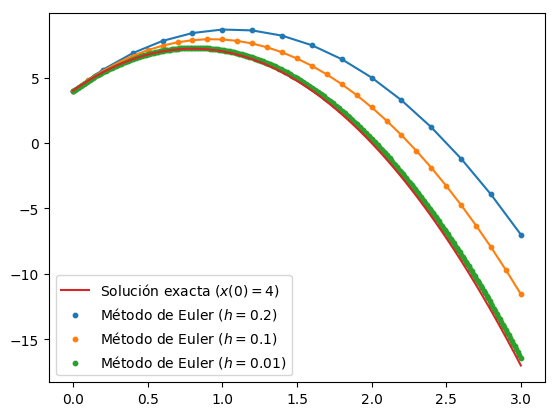

In [33]:
#Graficando
scatter(listat5,euler_5,label=L"Método de Euler ($h=0.2$)",s=10)
plot(listat5,euler_5)
scatter(listat6,euler_6,label=L"Método de Euler ($h=0.1$)",s=10)
plot(listat6,euler_6)
scatter(listat7,euler_7,label=L"Método de Euler ($h=0.01$)",s=10)
plot(listat7,euler_7)
plot(tsol,-5tsol.^2+8tsol+4,label=L"Solución exacta ($x(0)=4$)")
legend()
show()

Notamos que para $h\rightarrow0$ la aproximación resulta más cercana a los valores arrojados por la solución exacta.

FIN